In [6]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Initialize Faker for generating synthetic data
fake = Faker()

# Function to generate synthetic freight dataset
def generate_freight_data(num_records=1000):
    data = []
    for _ in range(num_records):
        origin = fake.city()
        destination = fake.city()
        freight_type = random.choice(['Dry Van', 'Refrigerated', 'Flatbed'])
        volume = round(random.uniform(100, 10000), 2)
        weight = round(random.uniform(500, 50000), 2)
        shipment_date = fake.date_between(start_date='-365d', end_date='today')
        arrival_date = shipment_date + timedelta(days=random.randint(1, 10))
        price = round(random.uniform(100, 5000), 2)

        data.append([origin, destination, freight_type, volume, weight, shipment_date, arrival_date, price])

    columns = ['Origin', 'Destination', 'FreightType', 'Volume', 'Weight', 'ShipmentDate', 'ArrivalDate', 'Price']
    df = pd.DataFrame(data, columns=columns)
    return df

# Generate a dataset with 1000 records
simulated_dataset = generate_freight_data()

# Save the dataset to a CSV file
simulated_dataset.to_csv('simulated_freight_data.csv', index=False)

# Load the dataset
df = pd.read_csv('simulated_freight_data.csv')

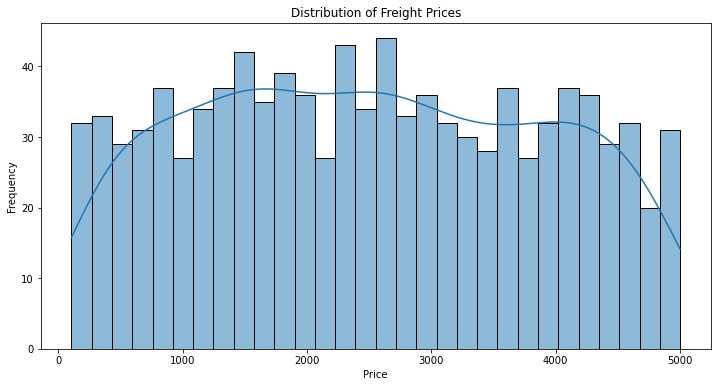

Mean Squared Error: 2375288.291406026


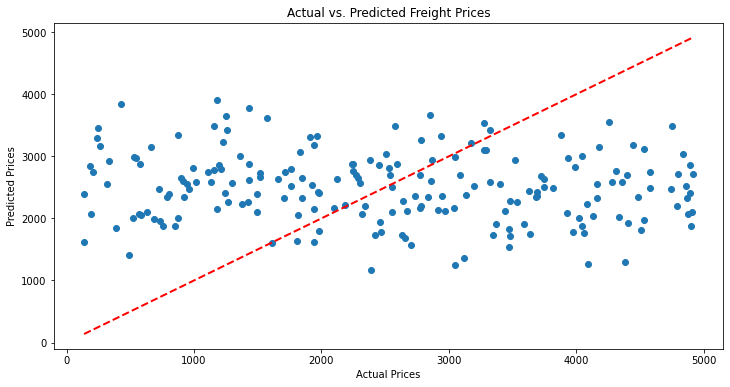

In [8]:
# Data Cleaning
# Convert date columns to datetime format
df['ShipmentDate'] = pd.to_datetime(df['ShipmentDate'])
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Freight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering
# Calculate the number of days in transit
df['DaysInTransit'] = (df['ArrivalDate'] - df['ShipmentDate']).dt.days

# Model Development
# Select features and target variable
X = df[['Volume', 'Weight', 'DaysInTransit']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualization of Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Freight Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()